# IEE 380 (Probability and Statistics) Project
Performing statistical analysis of the Black-Scholes model. Comparing the models price to the real price of Target call options. Created by Alex Yepiz

,K,sigma,realPrice,Black-Scholes,Difference
0,100,0.4321,32.65,30.967442,1.682558
1,105,0.4056,27.50,26.075051,1.424949
2,110,0.3897,22.70,21.305743,1.394257
3,115,0.3213,17.70,16.389970,1.310030
4,120,0.2741,12.90,11.675828,1.224172
5,125,0.2550,7.80,7.541710,0.258290
6,130,0.2495,4.55,4.346531,0.203469
7,135,0.2503,2.45,2.240370,0.209630
8,140,0.2577,1.18,1.088893,0.091107
9,145,0.2698,0.59,0.530121,0.059879


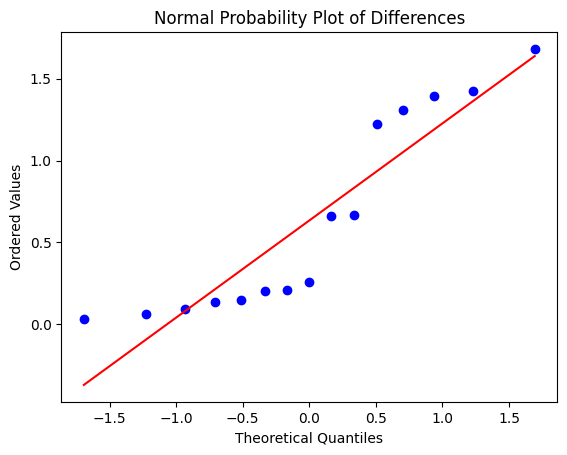



Black-Scholes Mean: 8.284760935497022
Black-Scholes Standard Deviation: 10.170565940950578
Real Mean: 8.918000000000003
Real Standard Deviation: 11.076370086166058
F-statistic: 0.9033551963061505
p-value: 0.8518582289957527
t-statistic: -0.16049294601483924
p-value for means: 0.8736450809241278


In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt


# Inputs
S = 130.49 # Stock Price
r = 0.0441 # Risk Free Rate
T = 32/365 # Time to expiration (years)
data= [
    # K: Strike Price
    # Sigma: Implied Volatility
    {"K": 100, "sigma": 0.4321, "realPrice": 32.65},
    {"K": 105, "sigma": 0.4056, "realPrice": 27.50},
    {"K": 110, "sigma": 0.3897, "realPrice": 22.70},
    {"K": 115, "sigma": 0.3213, "realPrice": 17.70},
    {"K": 120, "sigma": 0.2741, "realPrice": 12.90},
    {"K": 125, "sigma": 0.2550, "realPrice": 7.80},
    {"K": 130, "sigma": 0.2495, "realPrice": 4.55},
    {"K": 135, "sigma": 0.2503, "realPrice": 2.45},
    {"K": 140, "sigma": 0.2577, "realPrice": 1.18},
    {"K": 145, "sigma": 0.2698, "realPrice": 0.59},
    {"K": 150, "sigma": 0.2914, "realPrice": 0.33},
    {"K": 155, "sigma": 0.3334, "realPrice": 0.40},
    {"K": 160, "sigma": 0.3619, "realPrice": 0.32},
    {"K": 165, "sigma": 0.5258, "realPrice": 1.36},
    {"K": 170, "sigma": 0.5726, "realPrice": 1.34}
]


# Black-Scholes Model Function
def black_scholes(S, K, T, r, sigma):
    """
    Calculate the Black-Scholes price for a European call option.
    :param S: Spot price of the asset
    :param K: Strike price of the option
    :param T: Time to expiration in years
    :param r: Risk-free interest rate
    :param sigma: Volatility of the asset (implied volatility)
    :return: Call option price
    """
    d1 = (np.log(S / K) + (r + (sigma ** 2) / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    C = (stats.norm.cdf(d1) * S) - (stats.norm.cdf(d2) * K * np.exp(-r * T))
    return C


# Step 1: Display data
bs_price = [black_scholes(S, d['K'], T, r, d['sigma']) for d in data]
df = pd.DataFrame(data)
df['Black-Scholes'] = bs_price
df['Difference'] = df['realPrice'] - df['Black-Scholes']
display(df)

# Step 2: Create normal probability plot
stats.probplot(df['Difference'], dist="norm", plot=plt)
plt.title("Normal Probability Plot of Differences")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Ordered Values")
plt.show()

# Step 3: Mean and Standard Deviation of the two samples
bs_mean = np.mean(df['Black-Scholes'])
bs_std = np.std(df['Black-Scholes'])
real_mean = np.mean(df['realPrice'])
real_std = np.std(df['realPrice'], ddof=1)  # ddof=1 for sample standard deviation
print("\n")
print("Black-Scholes Mean:", bs_mean)
print("Black-Scholes Standard Deviation:", bs_std)
print("Real Mean:", real_mean)
print("Real Standard Deviation:", real_std)

# Step 4: Calculate F Statistic and P-Value
F = np.var(df['Black-Scholes'], ddof=1) / np.var(df['realPrice'], ddof=1)
dfn = len(df['Black-Scholes']) - 1
dfd = len(df['realPrice']) - 1
p_value = 2 * (1 - stats.f.cdf(F, dfn, dfd)) if F > 1 else 2 * stats.f.cdf(F, dfn, dfd)
print("F-statistic:", F)
print("p-value:", p_value)

#Step 5:
n1 = len(df['Black-Scholes']) # Sample sizes
n2 = len(df['realPrice'])
S1_squared = np.var(df['Black-Scholes'], ddof=1) # Sample variances
S2_squared = np.var(df['realPrice'], ddof=1)
Sp_squared = ((n1 - 1) * S1_squared + (n2 - 1) * S2_squared) / (n1 + n2 - 2) # Pooled variance
Sp = np.sqrt(Sp_squared)
X1_bar = bs_mean
X2_bar = real_mean
t_statistic = (X1_bar - X2_bar) / (Sp * np.sqrt(1/n1 + 1/n2))
df_pooled = n1 + n2 - 2 # Degrees of freedom
p_value_means = 2 * (1 - stats.t.cdf(abs(t_statistic), df_pooled))
print("t-statistic:", t_statistic)
print("p-value for means:", p_value_means)

